In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
att = pd.read_csv('./data/attendance2.csv')

In [30]:
att.columns

Index(['Timestamp',
       'Where would you categorize your home? (not school residence)',
       'Approximately how many grid-powered light-bulbs are in your residence?',
       'Anything else you would like us to know?'],
      dtype='object')

In [31]:
att = att.iloc[:, 1:3]

In [32]:
att.columns = ['area', 'bulbs']
att

,area,bulbs
0,Rural (or off the grid),11-20
1,Suburban,51 or more
2,Suburban,51 or more
3,Suburban,41-50
4,Suburban,31-40
5,Suburban,21-30
6,Suburban,21-30
7,Suburban,21-30
8,Suburban,11-20
9,Suburban,11-20


In [33]:
def get_int(s):
    if s == '1-10':
        return 1
    return int(s[0:2]) + 4

In [34]:
att['bulb_num'] = att['bulbs'].apply(get_int)

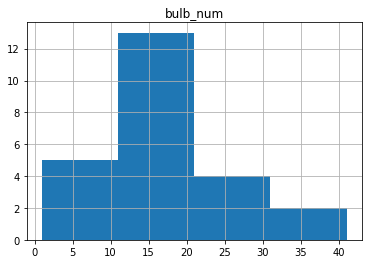

In [35]:
att.hist('bulb_num', bins=range(1, 51, 10));

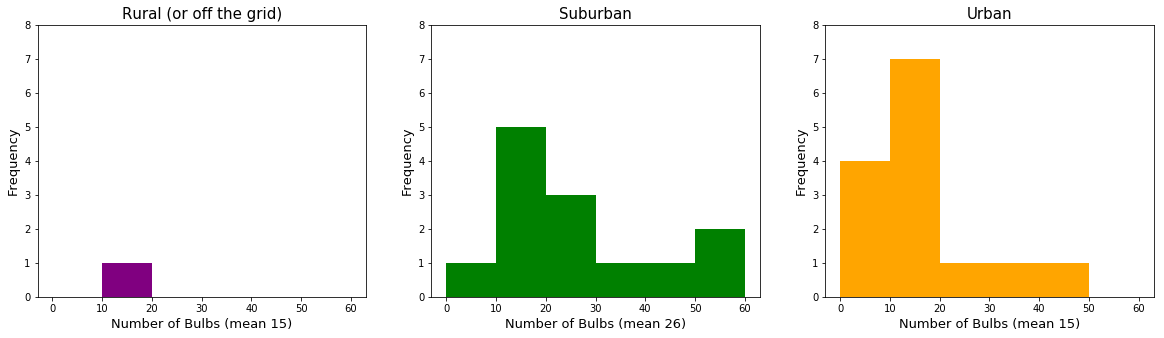

In [36]:
areas = [att[att['area'] == a] for a in att['area'].unique()]
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
axes = [ax1, ax2, ax3]
i = 0
colors = ['purple', 'green', 'orange']
for area in areas:
    ax = axes[i]
    ax.hist(area['bulb_num'], bins=range(0, 70, 10), color=colors[i])
    ax.set_xlabel('Number of Bulbs (mean ' + str(int(area['bulb_num'].mean())) + ')', fontsize=13)
    ax.set_ylabel('Frequency', fontsize=13)
    ax.set_title(area['area'].iloc[0], fontsize=15)
    ax.set_ylim(0, 8)
    i += 1
# plt.savefig('plots.png', format='png', dpi=1000)

In [37]:
areas[1]

,area,bulbs,bulb_num
1,Suburban,51 or more,55
2,Suburban,51 or more,55
3,Suburban,41-50,45
4,Suburban,31-40,35
5,Suburban,21-30,25
6,Suburban,21-30,25
7,Suburban,21-30,25
8,Suburban,11-20,15
9,Suburban,11-20,15
10,Suburban,11-20,15


In [38]:
areas[2]

,area,bulbs,bulb_num
14,Urban,41-50,45
15,Urban,31-40,35
16,Urban,21-30,25
17,Urban,11-20,15
18,Urban,11-20,15
19,Urban,11-20,15
20,Urban,11-20,15
21,Urban,11-20,15
22,Urban,11-20,15
23,Urban,11-20,15


In [39]:
suburb = areas[1]
urb = areas[2]

In [40]:
s_u = pd.concat([suburb, urb])
s_u.head()

,area,bulbs,bulb_num
1,Suburban,51 or more,55
2,Suburban,51 or more,55
3,Suburban,41-50,45
4,Suburban,31-40,35
5,Suburban,21-30,25


In [41]:
s_u.sample(n=len(s_u)).head()

,area,bulbs,bulb_num
22,Urban,11-20,15
12,Suburban,11-20,15
8,Suburban,11-20,15
25,Urban,1-10,1
16,Urban,21-30,25


In [42]:
def randomly_label(data):
    shuffled = data.sample(n=len(data))
    suburban = shuffled.iloc[:13]
    urban = shuffled.iloc[14:]
    return suburban['bulb_num'], urban['bulb_num']

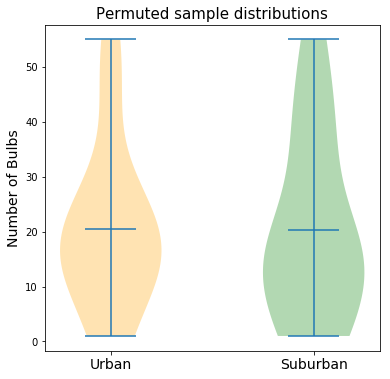

In [43]:
u, s = randomly_label(s_u)
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(111)
violin_parts = ax.violinplot((u, s), showmeans=True)
c = 'orange'
for pc in violin_parts['bodies']:
    pc.set_facecolor(c)
    c = 'green'
ax.set_xticks((1, 2))
ax.set_xticklabels(['Urban', "Suburban"], fontsize=14);
plt.ylabel('Number of Bulbs', fontsize = 14);
plt.title('Permuted sample distributions', fontsize=15);

In [44]:
def get_simulated_means(df):
    s, u = randomly_label(df)
    return s.mean(), u.mean()
dists = pd.DataFrame([get_simulated_means(s_u) for i in range(1000)])

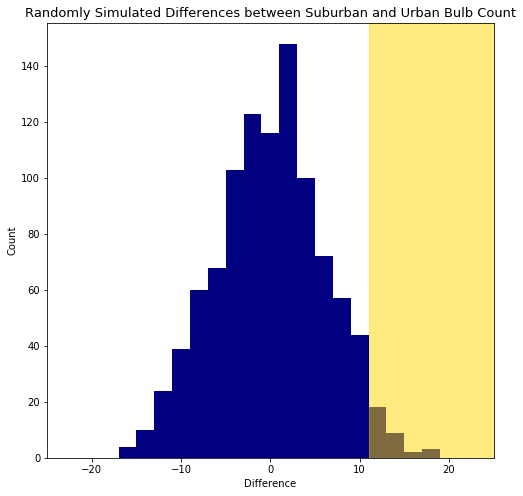

In [45]:
fig = plt.figure(figsize=(8, 8))
plt.hist(dists[0] - dists[1], bins=range(-25, 25, 2), color='navy')
plt.title('Randomly Simulated Differences between Suburban and Urban Bulb Count', fontsize=13)
plt.xlabel('Difference')
plt.ylabel('Count')
plt.axvspan(11, 25, color='gold', alpha=0.5)
plt.xlim(-25, 25);
# plt.savefig('diffs.png', format='png', dpi=1000)

In [46]:
random_over_difference = dists[dists[0] - dists[1] >= 11]
len(random_over_difference) / len(dists)

0.032